Import neccessary libraries

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
import warnings

In [146]:
# Suppress warninngs that might occur during the model fitting
warnings.filterwarnings("ignore")

Data Loading

In [147]:
try:
    df = pd.read_csv("SBUX.csv")
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: 'SBUX.csv' was not found check the if the file in the same directory")
    exit()
df

Data loaded successfully!


,Date,Open,High,Low,Close,Adj Close,Volume
0,1992-06-26,0.328125,0.347656,0.320313,0.335938,0.264262,224358400
1,1992-06-29,0.339844,0.367188,0.332031,0.359375,0.282698,58732800
2,1992-06-30,0.367188,0.371094,0.343750,0.347656,0.273479,34777600
3,1992-07-01,0.351563,0.359375,0.339844,0.355469,0.279625,18316800
4,1992-07-02,0.359375,0.359375,0.347656,0.355469,0.279625,13996800
...,...,...,...,...,...,...,...
7914,2023-11-29,101.510002,101.690002,99.529999,99.849998,99.849998,8428500
7915,2023-11-30,100.059998,100.120003,98.419998,99.300003,99.300003,11442600
7916,2023-12-01,98.500000,99.279999,97.519997,99.199997,99.199997,12503900
7917,2023-12-04,98.389999,98.879997,96.769997,97.599998,97.599998,11477400


Data Preprocessing

In [148]:
# Check for missing values
df_missing = df.isnull().sum()
print("Missing Values")
print(df_missing)

Missing Values
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [149]:
# Check for duplicated rows
df_duplicated = df.duplicated().sum()
print("Duplicated Rows")
print(df_duplicated)

Duplicated Rows
0


In [150]:
# Convert the date to datetime objects
#df["Date"] = pd.to_datetime(df["Date"])

Feature Engineering

In [151]:
# Define the feature matrix (X) and the target variable (y)

X = df[["Open"]]
y = df["Close"]

Data Splitting

In [152]:
# Split the data into training (80%) and testing (20%) sets
# random_state ensures reproducibility of the split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Visualization Before Training

Generating data visualization before training.....


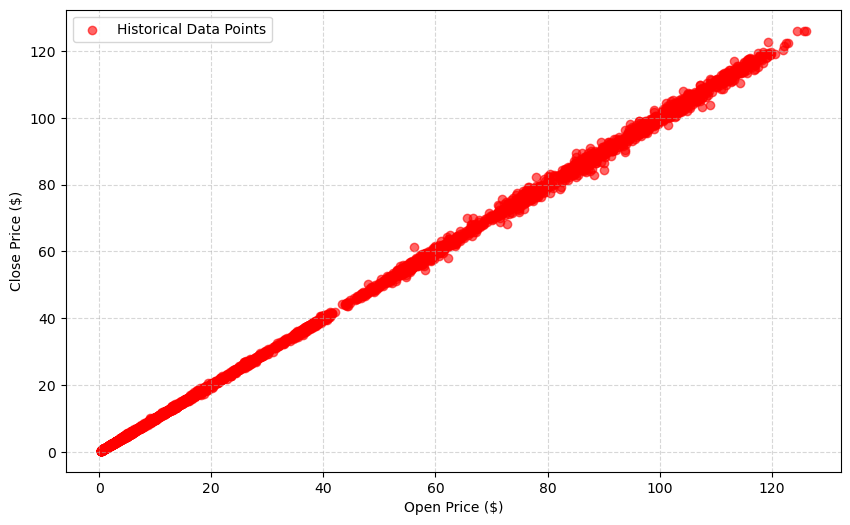

In [153]:
print("Generating data visualization before training.....")
plt.figure(figsize=(10,6))
plt.scatter(X,y,color="red",alpha=0.6,label="Historical Data Points")
plt.xlabel("Open Price ($)")
plt.ylabel("Close Price ($)")
plt.grid(True,linestyle="--",alpha=0.5)
plt.legend()
plt.show()

Model Training and Comaprison

In [154]:
# Dictionary to hold all models and a list to store results
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0,random_state=42),
    "Lasso Regression": Lasso(alpha=0.01,random_state=42,max_iter=2000),
    "Elastic Net": ElasticNet(alpha=0.01,l1_ratio=0.5,random_state=42,max_iter=2000)
}

results = []

# Iterate through each model
for name,model in models.items():
    # Train the model
    model.fit(X_train,y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the performance using the standard regression metrics
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)

    #  Store the results for comparison
    results.append({
        "Model" : name,
        "R-squared": r2,
        "Mean Squared Error": mse,
        "Predictions": y_pred
    })

    # Print the summary of the Model's performance
    print(f"{name} Results")
    print(f"R-squared: {r2:.4f}")
    print(f"MSE: {mse:.6f}")

    results_df = pd.DataFrame(results)

    # Identify the best model on the R-squared (highest R2 indicated best fit)
    best_model_name = results_df.loc[results_df["R-squared"].idxmax()]["Model"]
    best_model = models[best_model_name]
    print(f"Best Performing Model: {best_model_name}")

Linear Regression Results
R-squared: 0.9997
MSE: 0.279186
Best Performing Model: Linear Regression
Ridge Regression Results
R-squared: 0.9997
MSE: 0.279186
Best Performing Model: Linear Regression
Lasso Regression Results
R-squared: 0.9997
MSE: 0.279186
Best Performing Model: Linear Regression
Elastic Net Results
R-squared: 0.9997
MSE: 0.279186
Best Performing Model: Linear Regression


Visualization After Training

Generating visualization for the best model.....


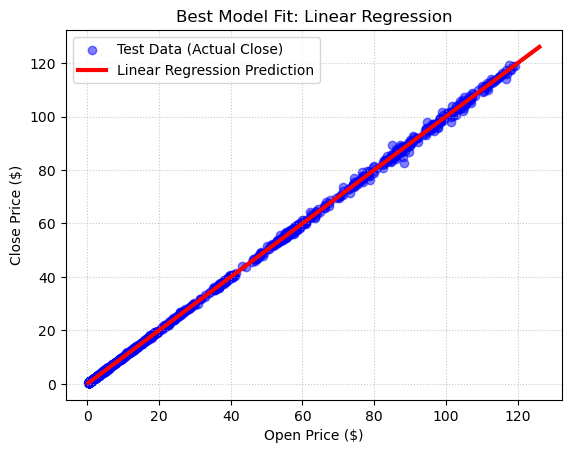

In [155]:
print("Generating visualization for the best model.....")

# Plot the test data (actual values)
plt.scatter(X_test,y_test,color="blue",alpha=0.5,label="Test Data (Actual Close)")

# Plot the best model's prediction (regression line/curve)
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

y_range_pred = best_model.predict(X_range)

# Plot the predicted line / curve
plt.plot(X_range,y_range_pred,color="red",linewidth=3,label=f"{best_model_name} Prediction")

plt.title(f"Best Model Fit: {best_model_name}")
plt.xlabel("Open Price ($)")
plt.ylabel("Close Price ($)")
plt.grid(True,linestyle=":",alpha=0.7)
plt.legend()
plt.show()

Interactive User Input and Prediction

In [156]:
def make_prediction(model,model_name):
    print(f"----- Predicting using the Best Model: {model_name} -----")

    while True:
        try:
            # Get user input for the Open Price
            open_price_input = input("Enter the Open Price you want to predict the Close Price")

            # Convert the input string to a float number
            open_price = float(open_price_input)

            # The model requires the input to be in 2D array format: [[value]]
            prediction_input = np.array([[open_price]])

            # Make the prediction
            predicted_close = model.predict(prediction_input)[0]

            # Display the result formatted two decimal places
            print(f"Based on the {model_name}:")
            print(f"If the Open Price is ${open_price:.3f}, the predicted Close Price is **${predicted_close:.2f}**")
            break
        except ValueError:
            # Handle cases where the input, is not a valid number
            print("Invalid input. Please enter a numerical value for the Open Price")

        except Exception as e:
            # Handle the unexpected errors
            print(f"An unexpected error occurred during prediction: {e}")
            break







# Call the prediction function with the best-performing model
make_prediction(best_model,best_model_name)

----- Predicting using the Best Model: Linear Regression -----
Based on the Linear Regression:
If the Open Price is $76666.550, the predicted Close Price is **$76662.38**
